In [61]:
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.text import Text
from nltk import collocations, FreqDist, bigrams, trigrams



# Part 1

In [168]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
hamlet_raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

emma_tokens = nltk.word_tokenize(emma_raw)
hamlet_tokens = nltk.word_tokenize(hamlet_raw)

emma_pos = nltk.pos_tag(emma_tokens)
hamlet_pos = nltk.pos_tag(hamlet_tokens)


emma_adjectives = [word[0].lower() for word in emma_pos if word[1][:2] == "JJ"]
hamlet_adjectives = [word[0].lower() for word in hamlet_pos if word[1][:2] == "JJ"]

In [169]:

print("Emma - 15 most common adjectives:\n")
print(FreqDist(emma_adjectives).most_common(15))

print("\n\nHamlet - 15 most common adjectives:\n")
print(FreqDist(hamlet_adjectives).most_common(15))



Emma - 15 most common adjectives:

[('such', 358), ('little', 347), ('much', 308), ('good', 299), ('own', 285), ('great', 262), ('more', 221), ('other', 220), ('young', 190), ('sure', 177), ('dear', 167), ('first', 160), ('many', 136), ('happy', 123), ('last', 119)]


Hamlet - 15 most common adjectives:

[('good', 94), ('thy', 54), ('most', 42), ('more', 41), ('such', 38), ('much', 27), ('other', 27), ('thou', 25), ('dead', 24), ('true', 21), ('great', 19), ('owne', 18), ('old', 16), ('mine', 16), ('sweet', 15)]


I wonder why 'such' is being routinely tagged as an adjective...




In [ ]:
print(nltk.pos_tag(nltk.word_tokenize("She is such a great cook.")))
print(nltk.pos_tag(nltk.word_tokenize("Such is their fate.")))
print(nltk.pos_tag(nltk.word_tokenize("there is no such thing as a free lunch")))


[('She', 'PRP'), ('is', 'VBZ'), ('such', 'JJ'), ('a', 'DT'), ('great', 'JJ'), ('cook', 'NN'), ('.', '.')]
[('Such', 'JJ'), ('is', 'VBZ'), ('their', 'PRP$'), ('fate', 'NN'), ('.', '.')]
[('there', 'EX'), ('is', 'VBZ'), ('no', 'DT'), ('such', 'JJ'), ('thing', 'NN'), ('as', 'IN'), ('a', 'DT'), ('free', 'JJ'), ('lunch', 'NN')]


Oh well... out-of-the box tagger is clearly not very good.

# Part 2

In [171]:
books = ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt',\
    'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt']

shakespeare_raw=austen_raw=''
for cur_book in books:
    author = cur_book.split('-')[0]
    if author == 'shakespeare':
        shakespeare_raw += nltk.corpus.gutenberg.raw(cur_book)
    elif author == 'austen':
        austen_raw += nltk.corpus.gutenberg.raw(cur_book)


austen_tokens = nltk.word_tokenize(austen_raw)
shakespeare_tokens = nltk.word_tokenize(shakespeare_raw)

austen_pos = nltk.pos_tag(austen_tokens)
shakespeare_pos = nltk.pos_tag(shakespeare_tokens)


austen_adjectives = [word[0].lower() for word in austen_pos if word[1][:2] == "JJ"]
shakespeare_adjectives = [word[0].lower() for word in shakespeare_pos if word[1][:2] == "JJ"]

In [173]:

print("Shakespeare - 15 most common adjectives:\n")
print(FreqDist(shakespeare_adjectives).most_common(15))

print("\n\nAusten - 15 most common adjectives:\n")
print(FreqDist(austen_adjectives).most_common(15))


Shakespeare - 15 most common adjectives:

[('good', 200), ('thy', 134), ('such', 87), ('more', 83), ('thou', 69), ('great', 69), ('most', 66), ('much', 59), ('noble', 56), ('other', 55), ('dead', 51), ('true', 45), ('many', 39), ('thee', 37), ('mine', 36)]


Austen - 15 most common adjectives:

[('such', 792), ('own', 712), ('little', 666), ('much', 613), ('good', 600), ('other', 547), ('more', 529), ('great', 526), ('young', 376), ('first', 374), ('sure', 363), ('many', 319), ('last', 309), ('same', 287), ('happy', 286)]


## Part 3

The problem only asked about verbs, but I am lemmatizing other words as well to the extent that the WordNet lemmatizer will allow me.

In [170]:
lemmatizer = nltk.WordNetLemmatizer()
tag_convert = {'JJ':'a', 'NN':'n', 'RB':'r', 'VB':'v'}


austen_lemmatized_pos=[]
for word_tag in austen_pos:
    try:
        austen_lemmatized_pos.append((lemmatizer.lemmatize(word_tag[0], tag_convert[word_tag[1][:2]]), word_tag[1]))
    except KeyError:
        austen_lemmatized_pos.append((lemmatizer.lemmatize(word_tag[0]), word_tag[1]))



shakespeare_lemmatized_pos=[]
for word_tag in shakespeare_pos:
    try:
        shakespeare_lemmatized_pos.append((lemmatizer.lemmatize(word_tag[0], tag_convert[word_tag[1][:2]]), word_tag[1]))
    except KeyError:
        shakespeare_lemmatized_pos.append((lemmatizer.lemmatize(word_tag[0]), word_tag[1]))



In [263]:
print("Unlemmatized verbs:\n")

austen_unlemmatized_verbs = [word[0].lower() for word in austen_pos if word[1][:2] == "VB" and word[0] not in stopwords.words('english')]
shakespeare_unlemmatized_verbs = [word[0].lower() for word in shakespeare_pos if word[1][:2] == "VB" and word[0] not in stopwords.words('english')]
print(FreqDist(austen_unlemmatized_verbs).most_common(15))
print(FreqDist(shakespeare_unlemmatized_verbs).most_common(15))


print('\n\n\n')
print("Lemmatized verbs:\n")

austen_lemmatized_verbs = [word[0].lower() for word in austen_lemmatized_pos if word[1][:2] == "VB" and word[0] not in stopwords.words('english')]
print(FreqDist(austen_lemmatized_verbs).most_common(15))

shakespeare_lemmatized_verbs = [word[0].lower() for word in shakespeare_lemmatized_pos if word[1][:2] == "VB" and word[0] not in stopwords.words('english')]
print(FreqDist(shakespeare_lemmatized_verbs).most_common(15))



Unlemmatized verbs:

[('said', 1052), ('think', 727), ('know', 692), ('say', 557), ('see', 517), ('made', 433), ('make', 377), ('thought', 370), ('give', 362), ('seemed', 323), ('come', 323), ('go', 310), ('felt', 292), ('done', 284), ('came', 276)]
[('haue', 328), ('let', 196), ('know', 163), ('come', 143), ("'s", 139), ('say', 109), ('see', 107), ('make', 102), ('speake', 89), ('go', 85), ('tell', 80), ('done', 79), ('take', 68), ('doe', 64), ('giue', 63)]




Lemmatized verbs:

[('say', 1772), ('think', 1208), ('know', 1161), ('make', 933), ('go', 852), ('see', 837), ('give', 802), ('come', 780), ('take', 529), ('hear', 494), ('seem', 471), ('look', 461), ('find', 451), ('tell', 411), ('speak', 408)]
[('haue', 328), ('come', 207), ('let', 199), ('make', 185), ('know', 183), ('go', 161), ('say', 146), ("'s", 139), ('see', 115), ('speake', 89), ('tell', 88), ('take', 85), ('doe', 64), ('giue', 63), ('put', 58)]


## Bonus 

In [36]:
from nltk.collocations import TrigramCollocationFinder
trigram_measures = nltk.collocations.TrigramAssocMeasures()

us = open("allUS.txt",'r').read()
us = nltk.word_tokenize(us)

uk = open("allUK.txt",'r').read()
uk = nltk.word_tokenize(uk)


In [62]:
#The slow way... searching through lists
us_no_stopwords = [word for word in us if word not in stopwords.words('english')]
uk_no_stopwords = [word for word in uk if word not in stopwords.words('english')]


no matches
None


In [261]:
#The fast way
# -- convert the stopwords list to a dictionary!

from collections import Counter
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)



Counter({'i': 1,
         'me': 1,
         'my': 1,
         'myself': 1,
         'we': 1,
         'our': 1,
         'ours': 1,
         'ourselves': 1,
         'you': 1,
         "you're": 1,
         "you've": 1,
         "you'll": 1,
         "you'd": 1,
         'your': 1,
         'yours': 1,
         'yourself': 1,
         'yourselves': 1,
         'he': 1,
         'him': 1,
         'his': 1,
         'himself': 1,
         'she': 1,
         "she's": 1,
         'her': 1,
         'hers': 1,
         'herself': 1,
         'it': 1,
         "it's": 1,
         'its': 1,
         'itself': 1,
         'they': 1,
         'them': 1,
         'their': 1,
         'theirs': 1,
         'themselves': 1,
         'what': 1,
         'which': 1,
         'who': 1,
         'whom': 1,
         'this': 1,
         'that': 1,
         "that'll": 1,
         'these': 1,
         'those': 1,
         'am': 1,
         'is': 1,
         'are': 1,
         'was': 1,
         'were': 1

It's straightforward enough to create that dictionary without using a for loop or using dict/zip like so:

In [ ]:
stopwords_d = dict(zip(stopwords.words('english'),iter(int, 1)))

In [278]:
us_colloc =  TrigramCollocationFinder.from_words(us_no_stopwords)
auk_colloc=  TrigramCollocationFinder.from_words(us_no_stopwords)

US [("'re", 'gon', 'na'), ("'m", 'gon', 'na'), ("'s", 'gon', 'na'), ('gon', 'na', 'go'), ('gon', 'na', 'get'), ('gon', 'na', 'happen'), ('gon', 'na', 'kill'), ('gon', 'na', 'take'), ('gon', 'na', "'s"), ('gon', 'na', 'tell'), ('gon', 'na', 'need'), ("n't", 'gon', 'na'), ('gon', 'na', 'make'), ('gon', 'na', 'talk'), ('gon', 'na', "n't"), ('gon', 'na', 'die'), ('gon', 'na', 'know'), ('gon', 'na', 'start'), ('gon', 'na', 'find'), ('never', 'gon', 'na')]


In [264]:
print("US",us_colloc.nbest(trigram_measures.likelihood_ratio, 20))
print("UK",uk_colloc.nbest(trigram_measures.likelihood_ratio, 20))


US [("'re", 'gon', 'na'), ("'m", 'gon', 'na'), ("'s", 'gon', 'na'), ('gon', 'na', 'go'), ('gon', 'na', 'get'), ('gon', 'na', 'happen'), ('gon', 'na', 'kill'), ('gon', 'na', 'take'), ('gon', 'na', "'s"), ('gon', 'na', 'tell'), ('gon', 'na', 'need'), ("n't", 'gon', 'na'), ('gon', 'na', 'make'), ('gon', 'na', 'talk'), ('gon', 'na', "n't"), ('gon', 'na', 'die'), ('gon', 'na', 'know'), ('gon', 'na', 'start'), ('gon', 'na', 'find'), ('never', 'gon', 'na')]
UK [('ca', "n't", 'know'), ('ca', "n't", 'want'), ('ca', "n't", 'think'), ('ca', "n't", 'believe'), ('ca', "n't", 'even'), ("'m", 'gon', 'na'), ('ca', "n't", "'s"), ("'re", 'gon', 'na'), ('ca', "n't", 'mind'), ('ca', "n't", 'tell'), ('ca', "n't", 'understand'), ('ca', "n't", 'get'), ('ca', "n't", 'let'), ('ca', "n't", 'need'), ('ca', "n't", 'say'), ('ca', "n't", 'make'), ('ca', "n't", "n't"), ('ca', "n't", 'go'), ('ca', "n't", 'see'), ('ca', "n't", 'mean')]


In [257]:
import timeit
import random
import pandas as pd

dfs=[]

for i in range(1,5000,100):
    cur_list = list(range(i))
    duration = timeit.repeat(lambda: i in cur_list, number=1000,repeat=5)
    dfs.append(pd.DataFrame({'cond':'list_search','length':i,'duration_1000':duration, 'num_runs':(1000)}))

for i in range(1,5000,100):
    cur_dict = dict(zip(list(range(i)),iter(int, 1)))
    duration = timeit.repeat(lambda: i in cur_dict, number=1000,repeat=5)
    dfs.append(pd.DataFrame({'cond':'dict_search','length':i,'duration_1000':duration, 'num_runs':(1000)}))

#sorting a list
for i in range(1,5000,100):
    cur_list = list(range(i))
    random.shuffle(cur_list)
    duration = timeit.repeat(lambda: cur_list.sort(), number=1000,repeat=5)
    dfs.append(pd.DataFrame({'cond':'list_sort','length':i,'duration_1000':duration, 'num_runs':(1000)}))



/Users/glupyan/anaconda3/envs/psych750/lib/python3.8/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/glupyan/anaconda3/envs/psych750/lib/python3.8/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/glupyan/anaconda3/envs/psych750/lib/python3.8/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


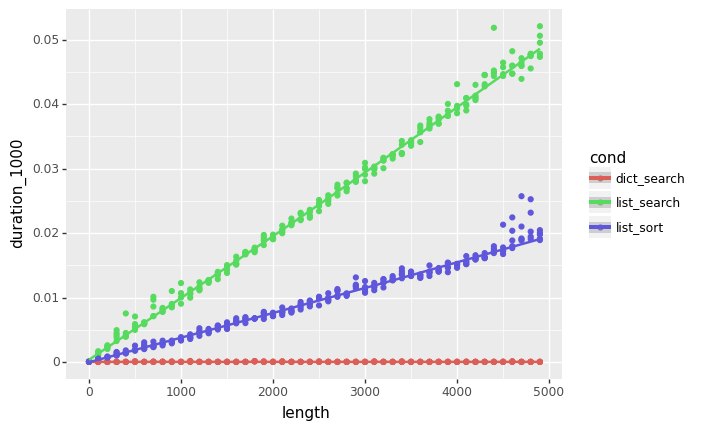

<ggplot: (8767637520288)>

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *


dat=pd.concat(dfs)
#print(dat.head(20))
from plotnine.data import mtcars

(ggplot(dat, aes(x='length', y='duration_1000', group='cond', color='cond'))
 + geom_point()
 + stat_smooth())


In [259]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://he-s3.s3.amazonaws.com/media/uploads/317c55e.png")
